In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import entropy

In [2]:
df=pd.read_csv('loan.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']:
    df[col].fillna(df[col].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)


C:\Users\jaydi\AppData\Local\Temp\ipykernel_16008\3341317954.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\jaydi\AppData\Local\Temp\ipykernel_16008\3341317954.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [6]:
df = pd.get_dummies(df, drop_first=True)


In [7]:
X = df.drop(columns=["Loan_Status_Y"]) 
y = df["Loan_Status_Y"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
clf = DecisionTreeClassifier(criterion="entropy", random_state=42) 
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [10]:
y_pred = clf.predict(X_test)

In [11]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7154471544715447

In [12]:
cm = confusion_matrix(y_test, y_pred)

In [13]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n       False       0.63      0.44      0.52        43\n        True       0.74      0.86      0.80        80\n\n    accuracy                           0.72       123\n   macro avg       0.69      0.65      0.66       123\nweighted avg       0.70      0.72      0.70       123\n'

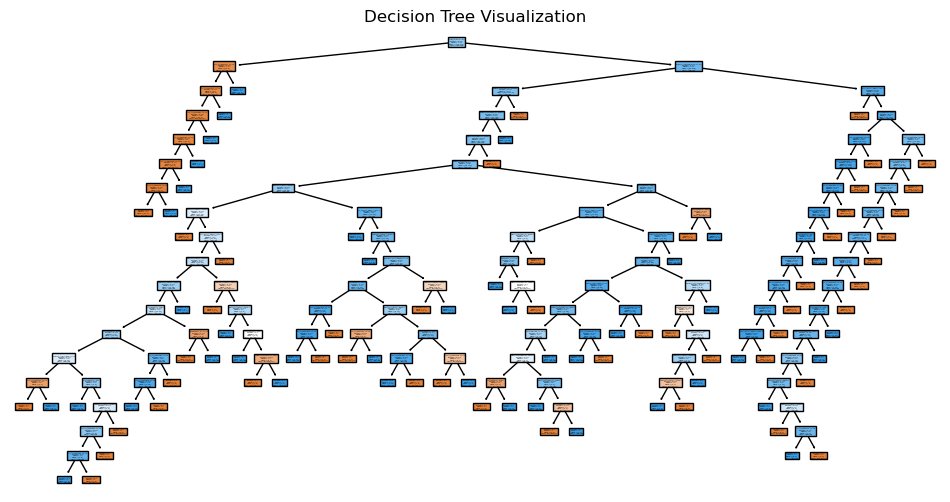

In [15]:
plt.figure(figsize=(12, 6))
plot_tree(clf, feature_names=X.columns, class_names=["Not Approved", "Approved"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

In [16]:
def calculate_entropy(y):
    class_counts = np.bincount(y)
    probabilities = class_counts / len(y)
    return entropy(probabilities, base=2)


In [17]:
calculate_entropy(y)

0.8962696698442931